### Data Exploration

Data Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The zip file includes two datasets: 

- bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
- bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).
   
We will use bank-additional-full

#### Attribute Information:

#### bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
#### related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
#### other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
#### social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
    

### Data Information

This research focus on targeting through telemarketing phone calls
to sell long-term deposits. Within a campaign, the human agents execute
phone calls to a list of clients to sell the deposit (outbound) or, if
meanwhile the client calls the contact-center for any other reason, he
is asked to subscribe the deposit (inbound). Thus, the result is a binary
unsuccessful or successful contact.
This study considers real data collected from a Portuguese retail
bank, from May 2008 to June 2013, in a total of 52,944 phone contacts.
The dataset is unbalanced, as only 6557 (12.38%) records are related
with successes. For evaluation purposes, a time ordered split was initially
performed, where the records were divided into training (four years)
and test data (one year). The training data is used for feature and model
selection and includes all contacts executed up to June 2012, in a total of
51,651 examples. The test data is used for measuring the prediction capabilities
of the selected data-driven model, including the most recent
1293 contacts, from July 2012 to June 2013.
Each record included the output target, the contact outcome ({“failure”,
“success”}), and candidate input features. These include telemarketing
attributes (e.g., call direction), product details (e.g., interest rate
offered) and client information (e.g., age). These records were enriched
with social and economic influence features (e.g., unemployment variation
rate), by gathering external data from the central bank of the Portuguese
Republic statistical web site1
. The merging of the two data sources
led to a large set of potentially useful features, with a total of 150 attributes

http://media.salford-systems.com/video/tutorial/2015/targeted_marketing.pdf

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('data')

['.DS_Store',
 '08-10_theglobaleconomy_1.csv',
 '08-10_theglobaleconomy_2.csv',
 'daily_euribor3m.csv',
 'X_train.csv',
 '04-07_theglobaleconomy_1.csv',
 'data_ready.pickle',
 '04-07_theglobaleconomy_2.csv',
 'y_train.csv',
 'y_test.csv',
 'X_test.csv',
 'bank-additional-full.csv']

In [3]:
df = pd.read_pickle('data/data_ready.pickle')
df.drop('duration', axis=1, inplace=True)

From the Readme: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [4]:
df.isnull().sum()

year                        0
month                       0
day                         0
age                         0
job                         0
marital                     0
education                   0
default                     0
housing                     0
loan                        0
contact                     0
month_last_contact          0
day_of_week_last_contact    0
campaign                    0
pdays                       0
previous                    0
poutcome                    0
emp.var.rate                0
cons.price.idx              0
cons.conf.idx               0
euribor3m                   0
nr.employed                 0
y                           0
weekday                     0
month_total_days            0
is_holiday                  0
holiday_name                0
biz_payday                  0
govt_payday                 0
dtype: int64

In [5]:
df.describe()

,year,month,day,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,weekday,month_total_days,is_holiday,biz_payday,govt_payday
count,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,2008.377683,6.607264,15.544285,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,2.140138,30.694207,0.000073,0.054676,0.067423
std,0.578773,2.040412,7.687609,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,1.437973,0.460748,0.008534,0.227350,0.250755
min,2008.000000,3.000000,1.000000,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,2008.000000,5.000000,8.000000,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000,30.000000,0.000000,0.000000,0.000000
50%,2008.000000,6.000000,16.000000,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.000000,31.000000,0.000000,0.000000,0.000000
75%,2009.000000,8.000000,21.000000,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,31.000000,0.000000,0.000000,0.000000
max,2010.000000,12.000000,31.000000,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,4.000000,31.000000,1.000000,1.000000,1.000000


In [6]:
len(df.columns)

29

In [7]:
df.columns

Index(['year', 'month', 'day', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month_last_contact',
       'day_of_week_last_contact', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'weekday', 'month_total_days', 'is_holiday',
       'holiday_name', 'biz_payday', 'govt_payday'],
      dtype='object')

In [8]:
df.head()

,year,month,day,age,job,marital,education,default,housing,loan,...,cons.conf.idx,euribor3m,nr.employed,y,weekday,month_total_days,is_holiday,holiday_name,biz_payday,govt_payday
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-05,2008,5,5,56,housemaid,married,basic.4y,no,no,no,...,-36.4,4.857,5191.0,no,0,31,0,No Holiday,0,0
2008-05-05,2008,5,5,57,services,married,high.school,unknown,no,no,...,-36.4,4.857,5191.0,no,0,31,0,No Holiday,0,0
2008-05-05,2008,5,5,37,services,married,high.school,no,yes,no,...,-36.4,4.857,5191.0,no,0,31,0,No Holiday,0,0
2008-05-05,2008,5,5,40,admin.,married,basic.6y,no,no,no,...,-36.4,4.857,5191.0,no,0,31,0,No Holiday,0,0
2008-05-05,2008,5,5,56,services,married,high.school,no,no,yes,...,-36.4,4.857,5191.0,no,0,31,0,No Holiday,0,0


In [9]:
df.dtypes

year                          int64
month                         int64
day                           int64
age                           int64
job                          object
marital                      object
education                    object
default                      object
housing                      object
loan                         object
contact                      object
month_last_contact           object
day_of_week_last_contact     object
campaign                      int64
pdays                         int64
previous                      int64
poutcome                     object
emp.var.rate                float64
cons.price.idx              float64
cons.conf.idx               float64
euribor3m                   float64
nr.employed                 float64
y                            object
weekday                       int64
month_total_days              int64
is_holiday                    int64
holiday_name                 object
biz_payday                  

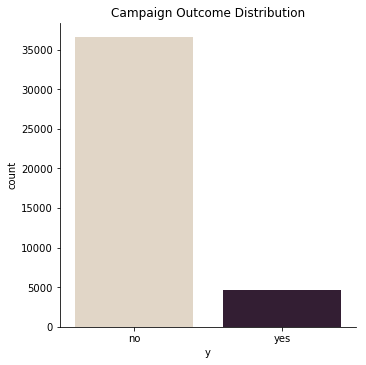

In [10]:
sns.catplot(x="y", kind="count", palette="ch:.25", data=df)
plt.title("Campaign Outcome Distribution")
plt.show()

Let's investigate the relationship between each variable and y

In [11]:
num_cols = list(df.select_dtypes(include = ['int64', 'float64']))

In [12]:
num_cols

['year',
 'month',
 'day',
 'age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'weekday',
 'month_total_days',
 'is_holiday',
 'biz_payday',
 'govt_payday']

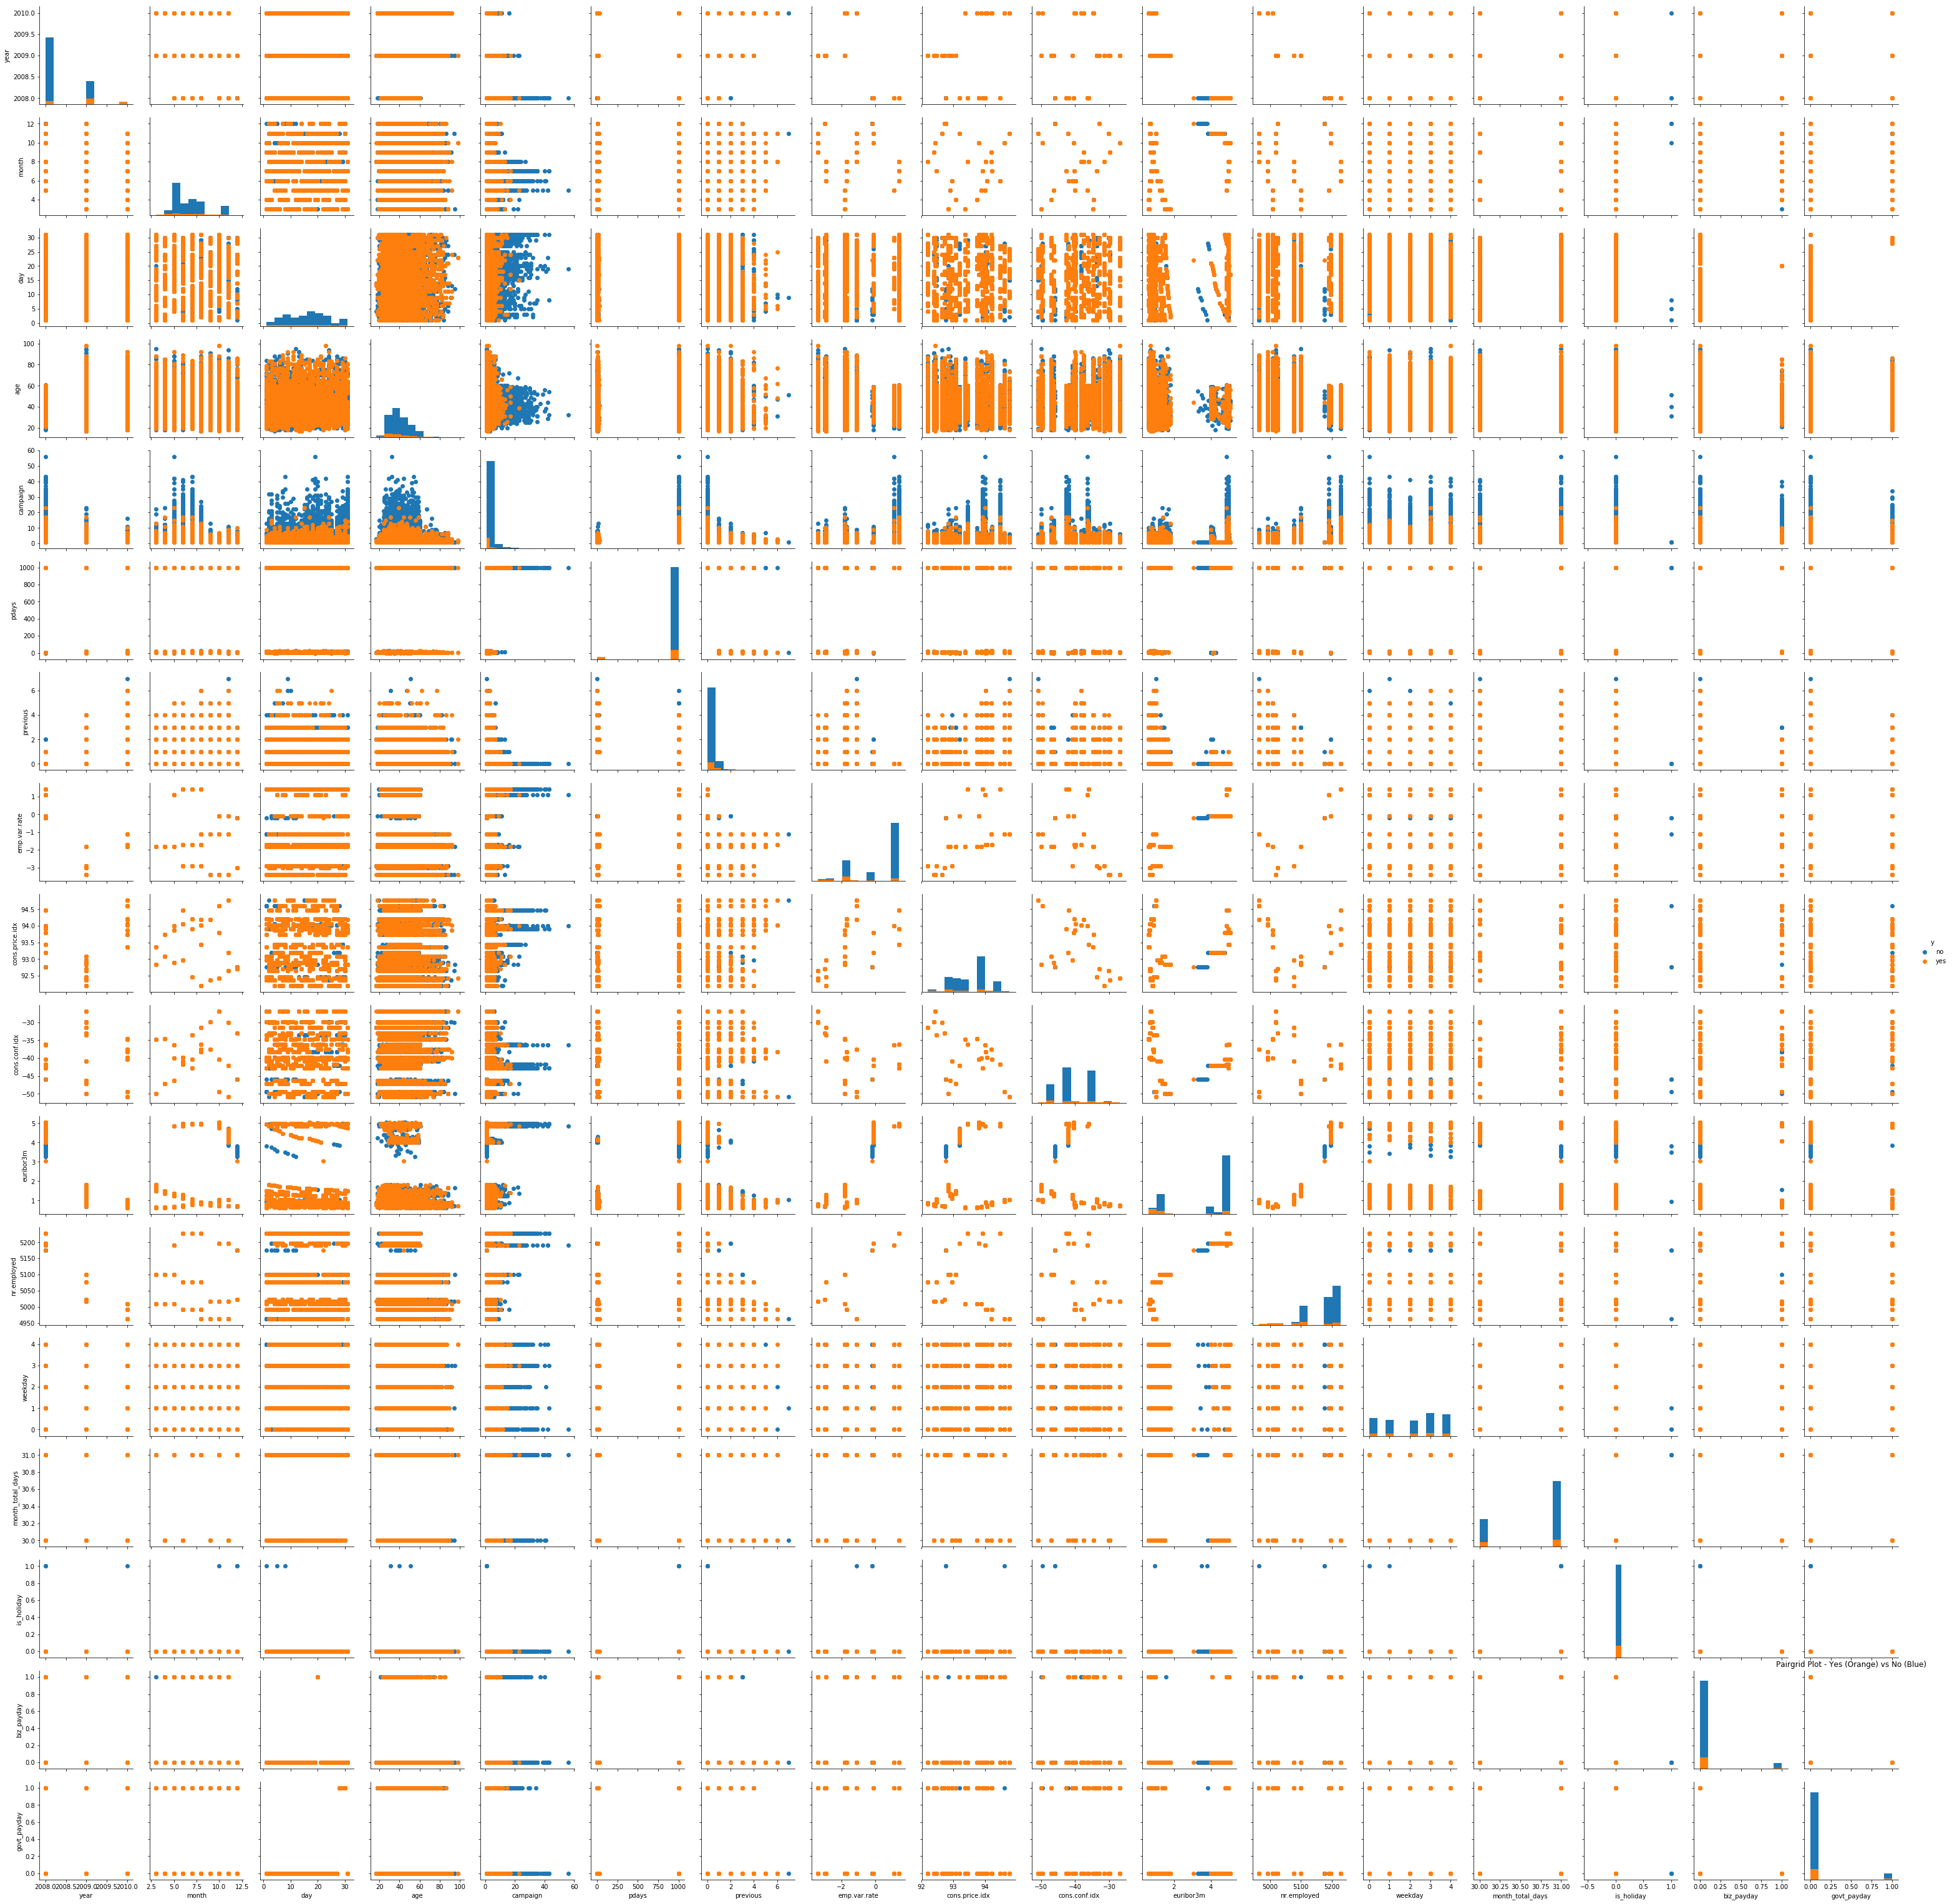

In [16]:
g = sns.PairGrid(df, hue="y")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
plt.title("Pairgrid Plot - Yes (Orange) vs No (Blue)")
plt.show()

Let's evaluate the distribution of each variable with respect to one another and also show y vs n in different colors

In [13]:
num_cols.append("y")

Let's investigate the relationship between each variable '

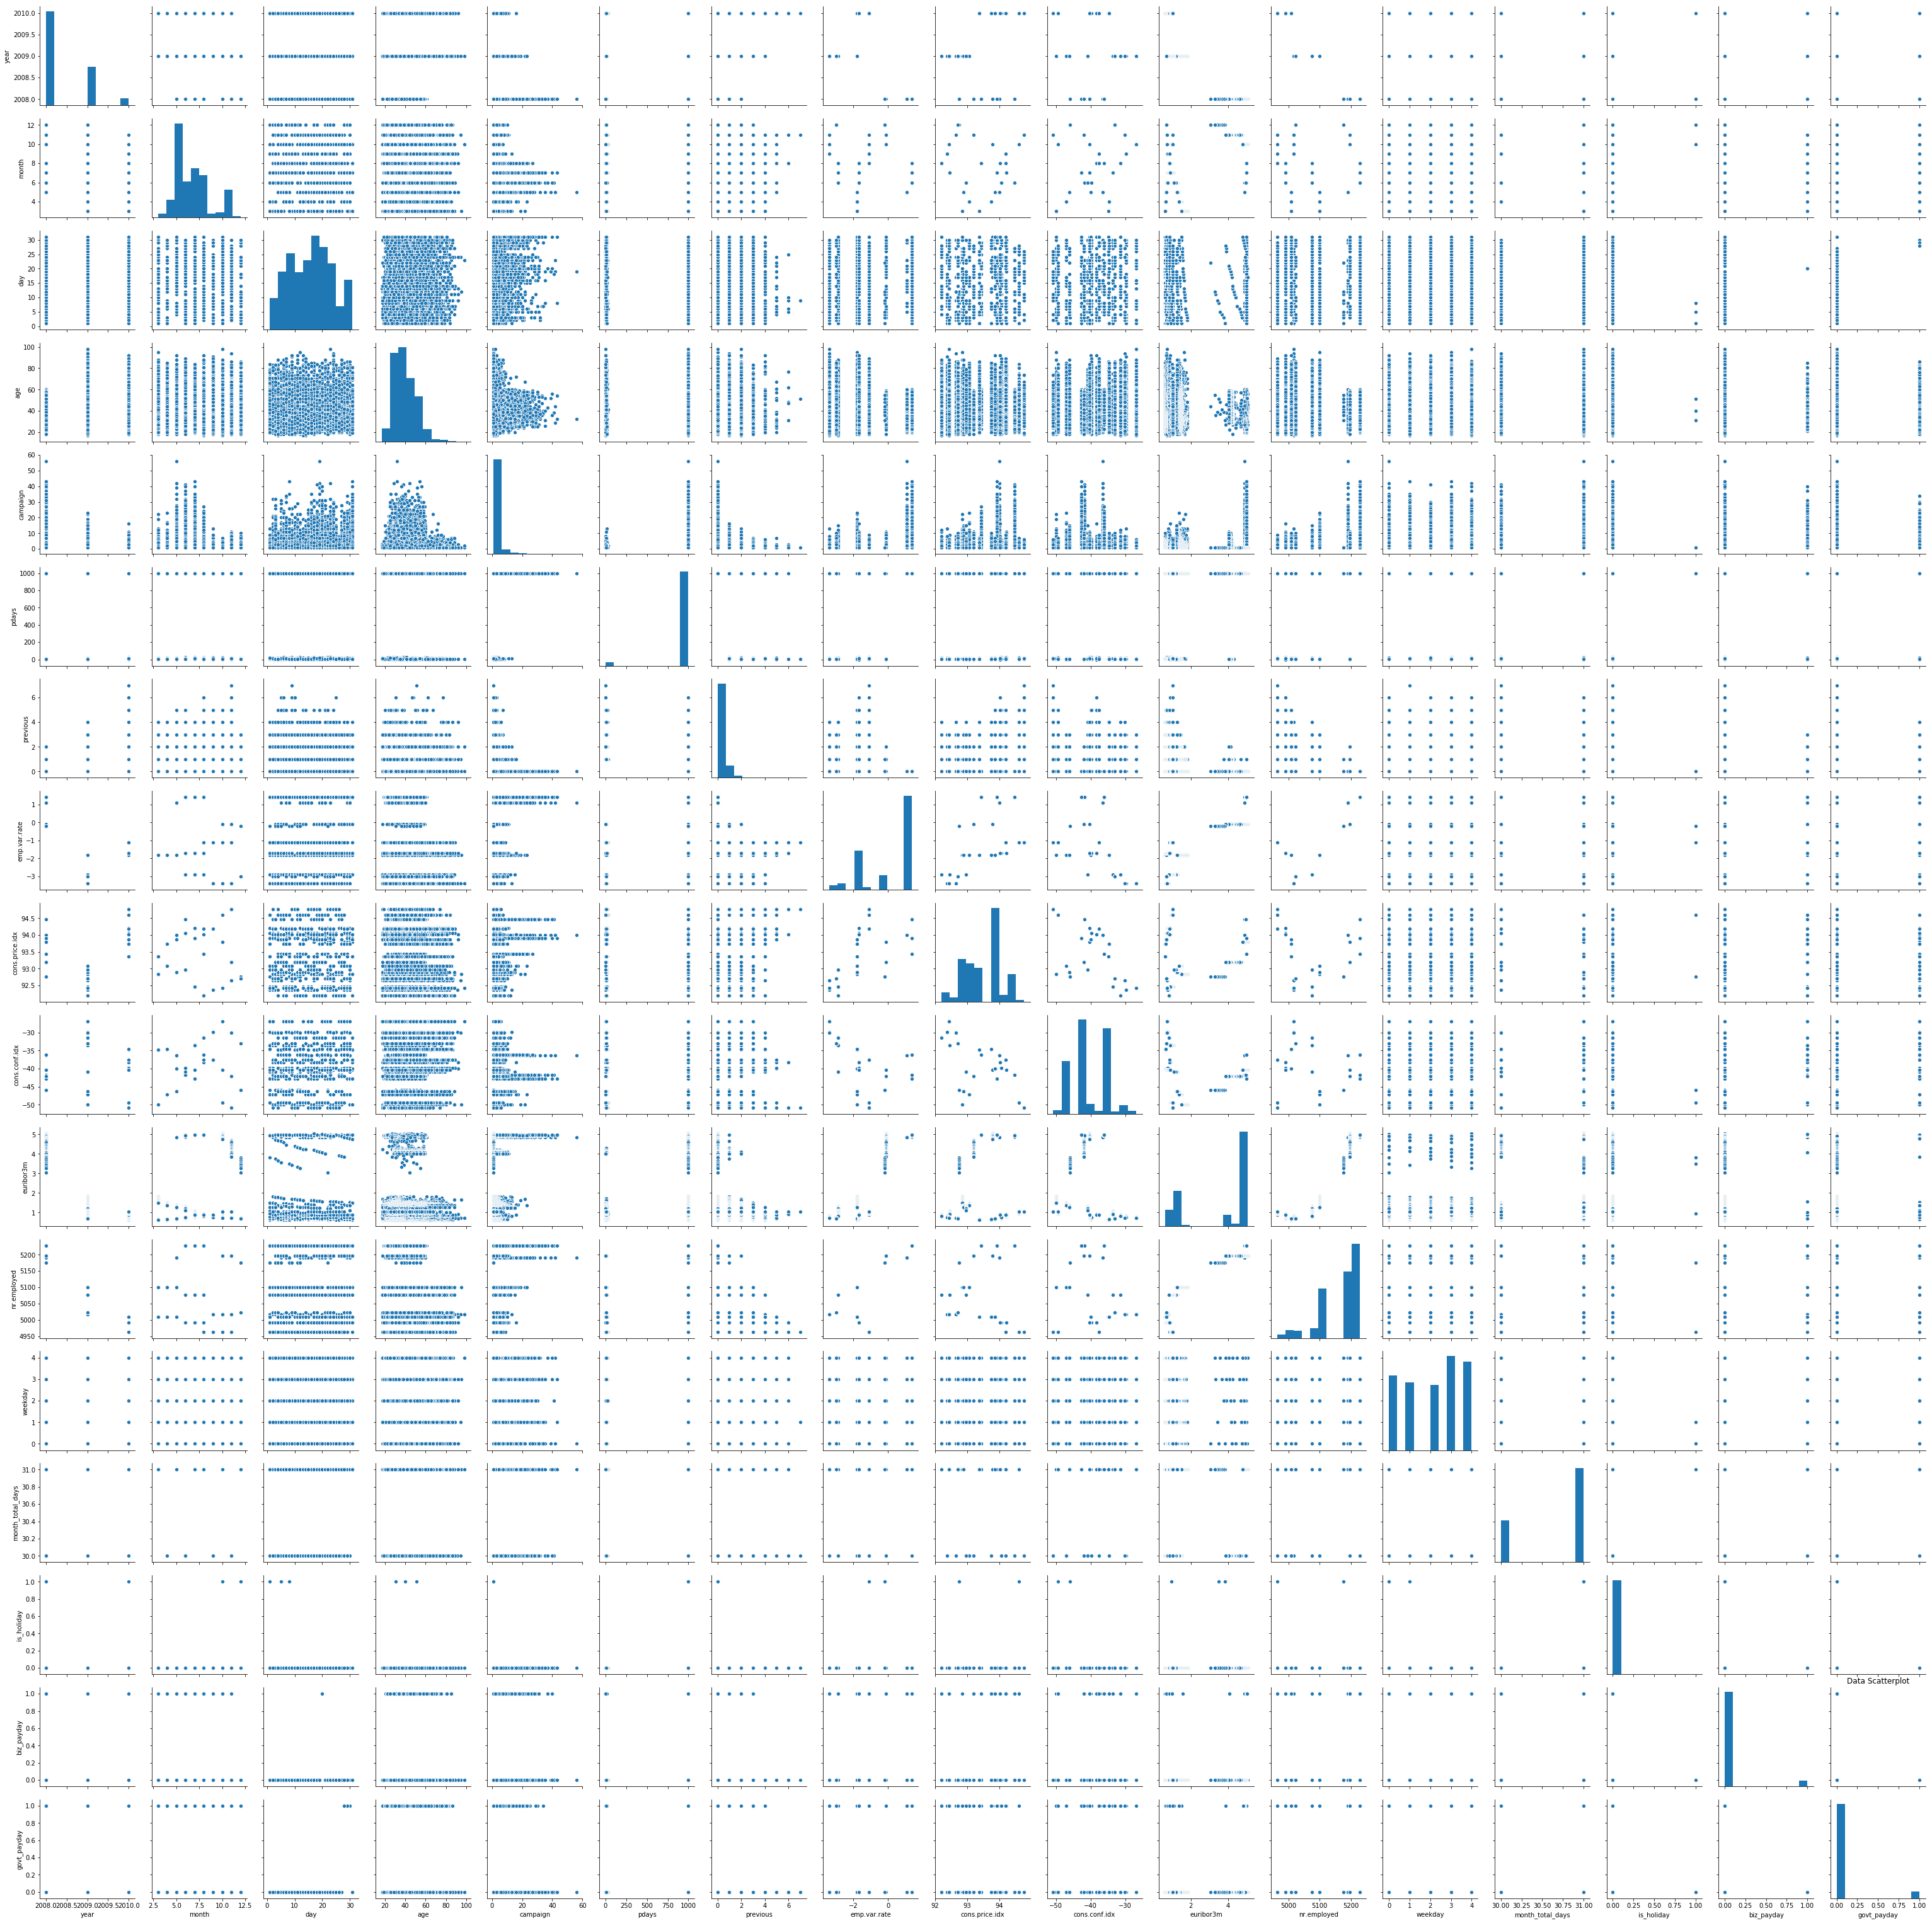

In [18]:
sns.pairplot(df)
plt.title("Data Scatterplot")
plt.show()

Based on the above, let's investigate the following variables in more detail:

    - Campaign
    - Age
    - Euribor 3M
    - Pdays
    - Duration vs Euribor 3M
    - Age vs Euribor 3M
    - Campaign vs Euribor 3M

In [14]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

Let's investigate Customer attributes in comparison with Campaign Data

#### bank client data:
    1 - age 
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan

In [15]:
df_cats = df.select_dtypes(include='object')

In [16]:
df_cats.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month_last_contact', 'day_of_week_last_contact', 'poutcome', 'y',
       'holiday_name'],
      dtype='object')

In [17]:
df_cats = df_cats.astype('category')

In [18]:
for i in df_cats.columns:
    df_cats[i] = df_cats[i].cat.codes

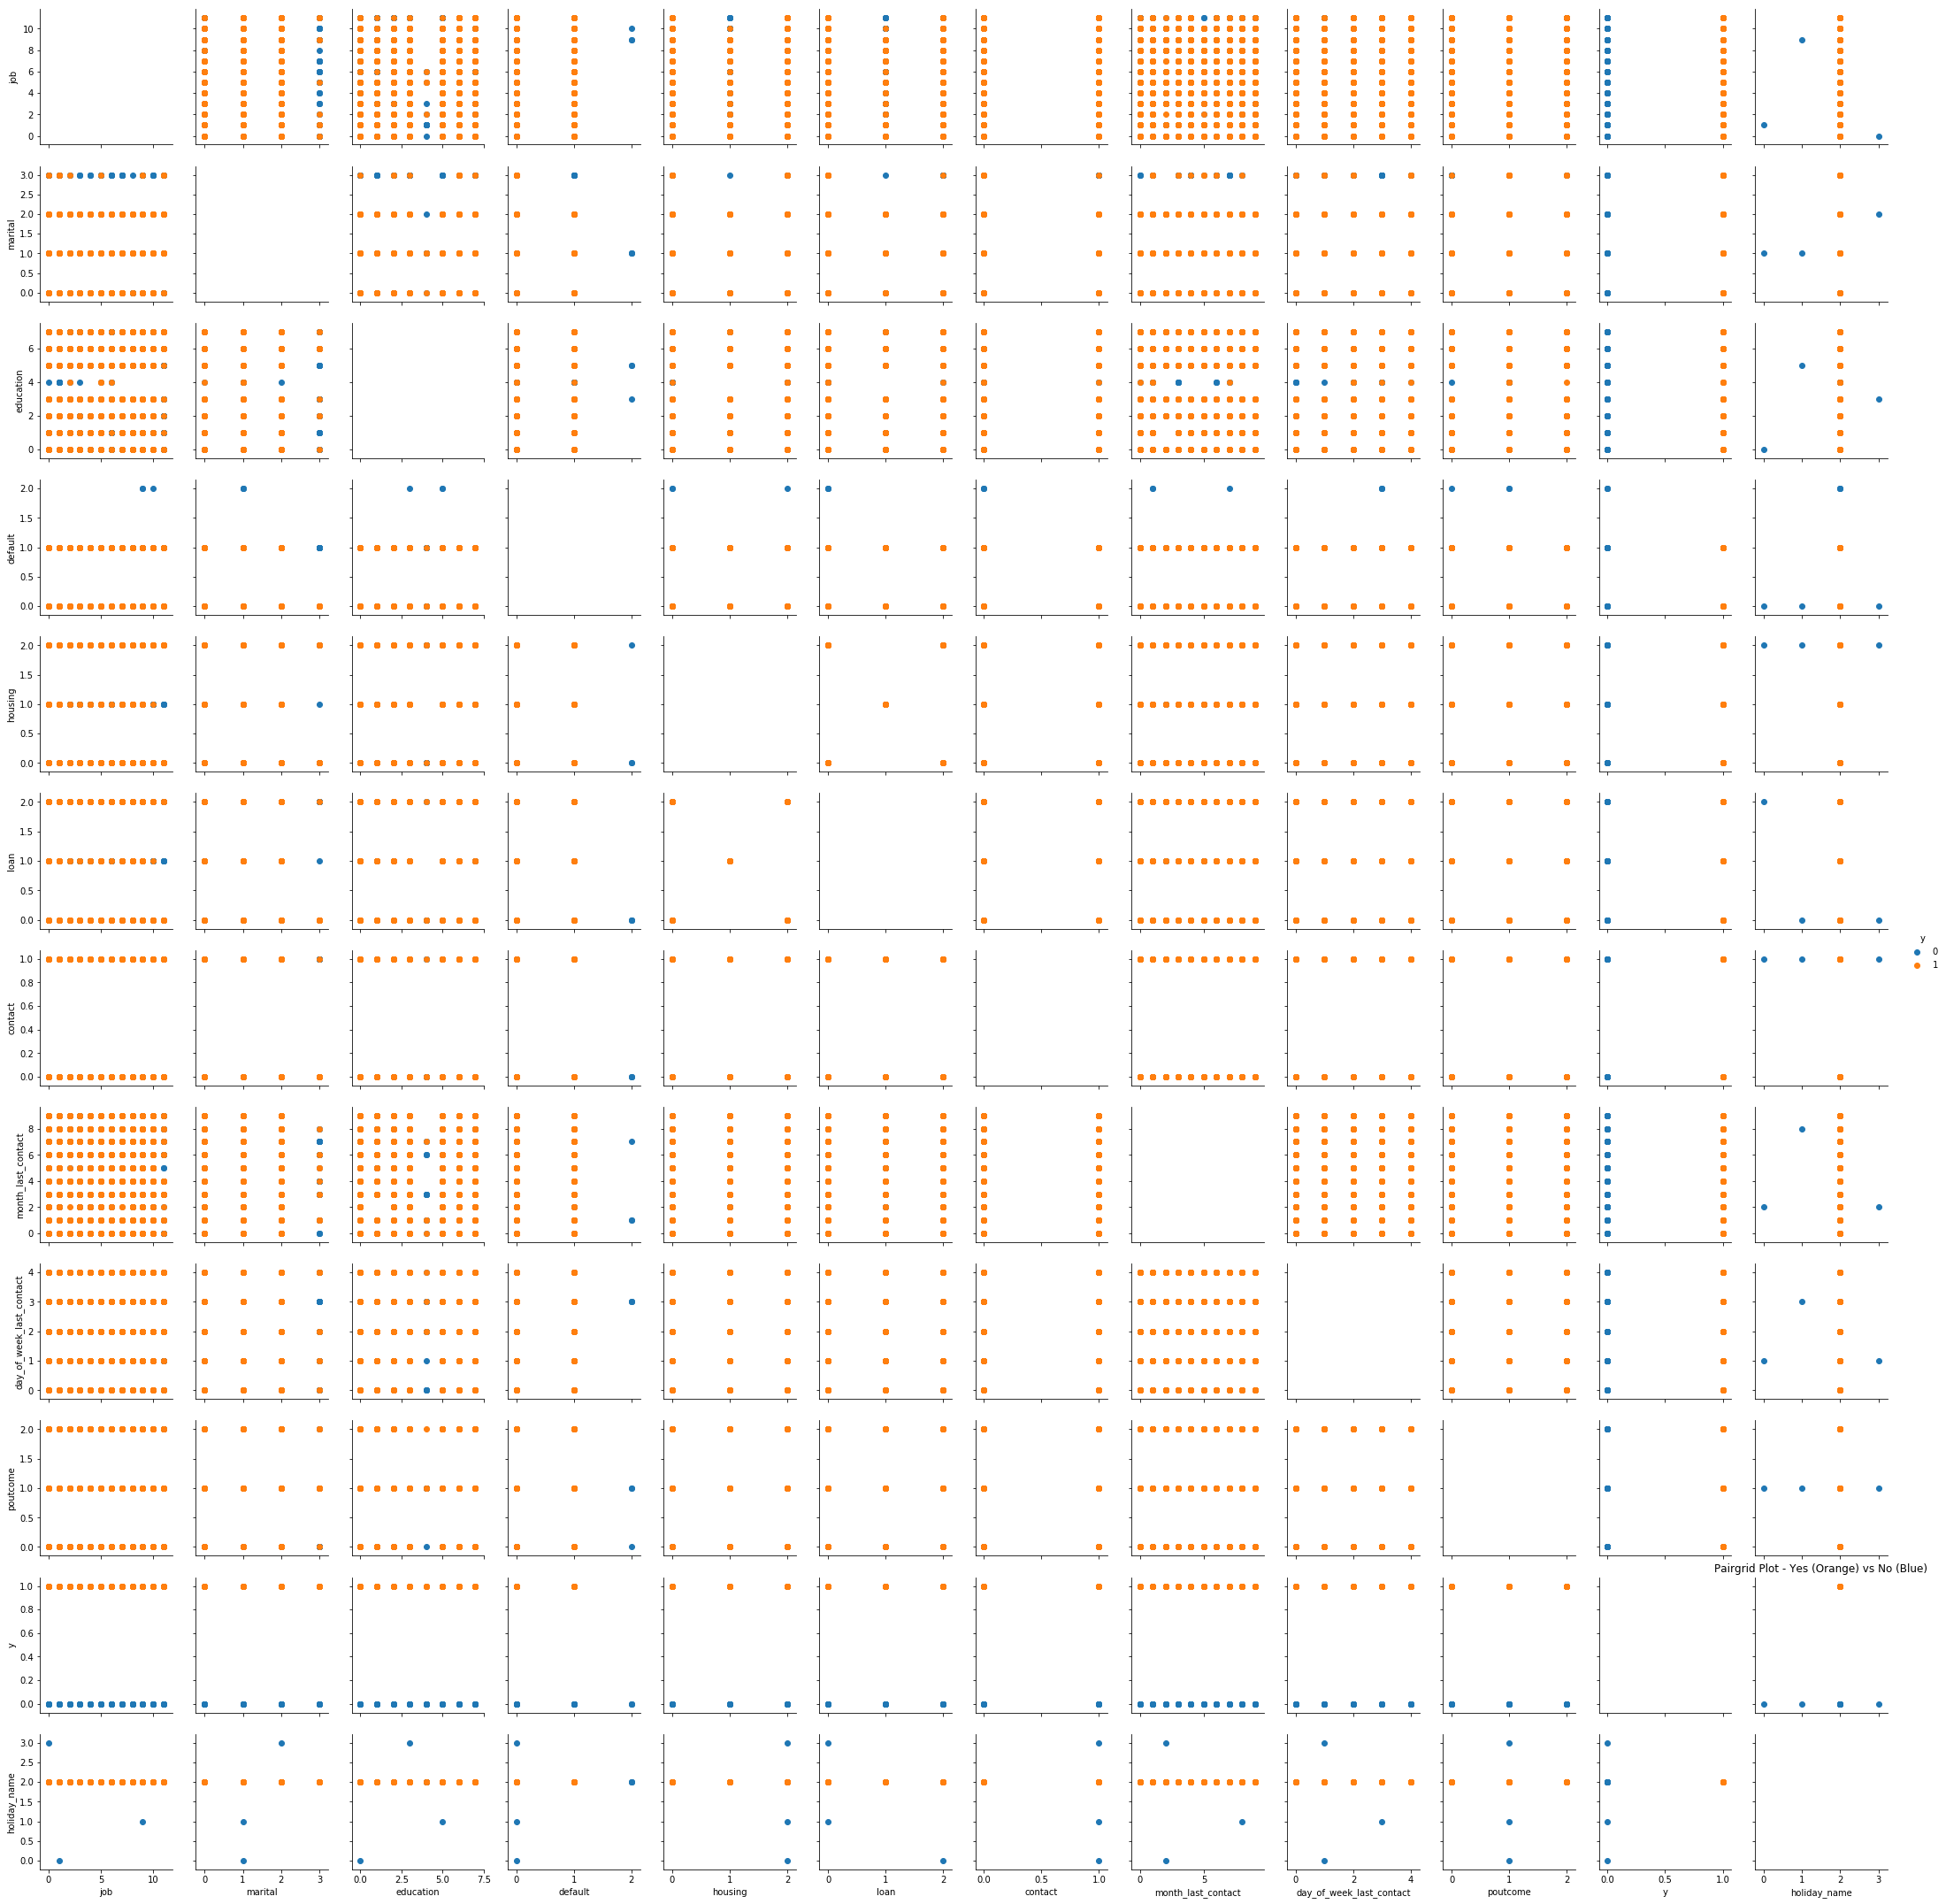

In [24]:
g = sns.PairGrid(df_cats, hue="y")
#g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
plt.title("Pairgrid Plot - Yes (Orange) vs No (Blue)")
plt.show()

Now we compare the most interesting numeric attributes with the categorical variables above:

In [19]:
new_df = df[num_cols].join(df_cats, how='inner', lsuffix = 'left', rsuffix = 'right')

In [20]:
new_df.columns

Index(['year', 'month', 'day', 'age', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'weekday', 'month_total_days', 'is_holiday',
       'biz_payday', 'govt_payday', 'yleft', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month_last_contact',
       'day_of_week_last_contact', 'poutcome', 'yright', 'holiday_name'],
      dtype='object')

In [21]:
new_df.drop(columns = ['yleft'], inplace=True)

In [22]:
new_df.rename(columns = {'yright':'y'}, inplace=True)

In [ ]:
g = sns.PairGrid(new_df, hue = "y")
#g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.title("Pairgrid Plot - Yes (Orange) vs No (Blue)")
plt.show()

KeyboardInterrupt: 

In [23]:
new_df.columns

Index(['year', 'month', 'day', 'age', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'weekday', 'month_total_days', 'is_holiday',
       'biz_payday', 'govt_payday', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month_last_contact',
       'day_of_week_last_contact', 'poutcome', 'y', 'holiday_name'],
      dtype='object')

Insights:
    
    - Campaign size tend to get a lot more Y as a % of total as age increases
    - Duration tend to get a lot more Y as a % of total as age increases
    - Job does not seem to be a significant predictor for interaction outcome
    - Some campaigns have very few positive outcomes as a percentage of total attempts while others have much higher positive rates

In [24]:
print("Category Codes for Education")
cats_edu = dict(zip(df['education'], df['education'].astype('category').cat.codes))
sorted(cats_edu.items(), key = lambda x: x[1])

Category Codes for Education


[('basic.4y', 0),
 ('basic.6y', 1),
 ('basic.9y', 2),
 ('high.school', 3),
 ('illiterate', 4),
 ('professional.course', 5),
 ('university.degree', 6),
 ('unknown', 7)]

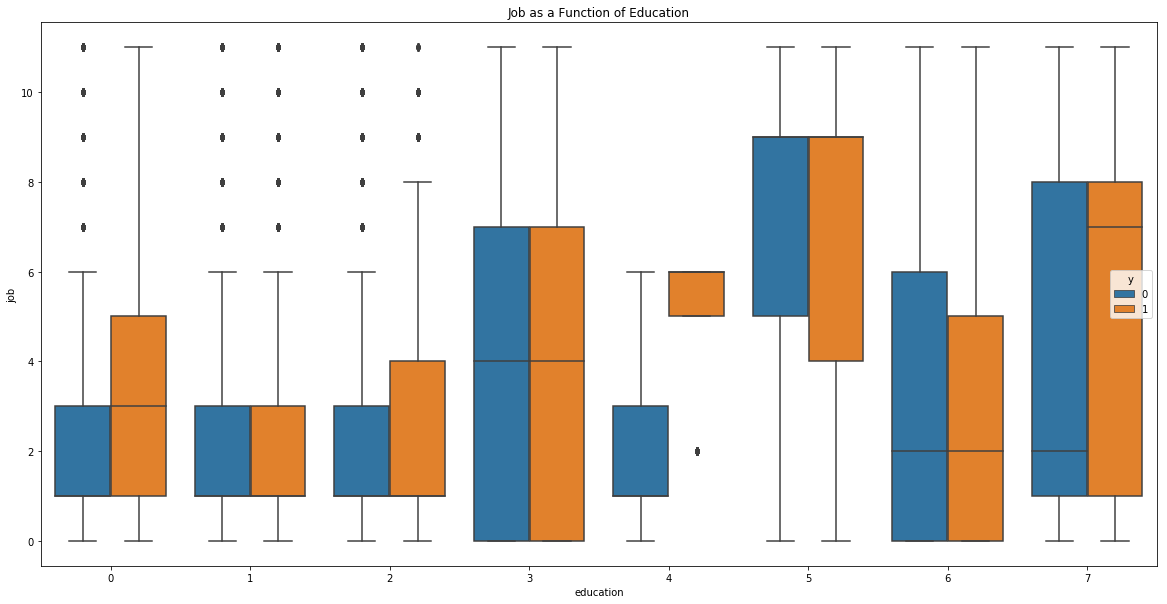

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(ax=ax, x = 'education', y = 'job', hue = 'y', data = new_df)

plt.title("Job as a Function of Education")
plt.show()

In [26]:
print("Category Codes for Job")
cats_job = dict(zip(df['job'], df['job'].astype('category').cat.codes))
sorted(cats_job.items(), key = lambda x: x[1])

Category Codes for Job


[('admin.', 0),
 ('blue-collar', 1),
 ('entrepreneur', 2),
 ('housemaid', 3),
 ('management', 4),
 ('retired', 5),
 ('self-employed', 6),
 ('services', 7),
 ('student', 8),
 ('technician', 9),
 ('unemployed', 10),
 ('unknown', 11)]

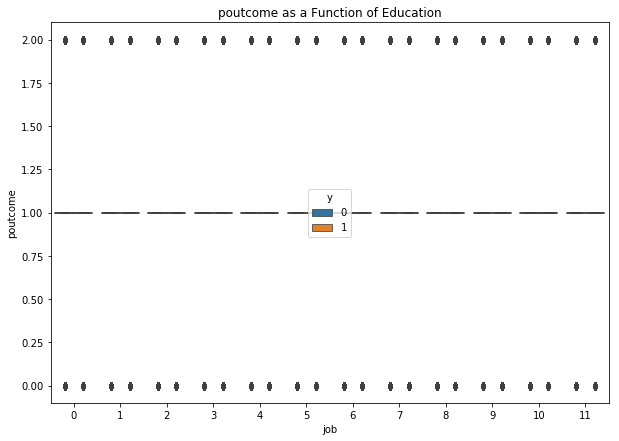

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(ax=ax, x = 'job', y = 'poutcome', hue = 'y', data = new_df)

plt.title("poutcome as a Function of Education")
plt.show()

Distribution Plots for Some of the Most Important Features

In [28]:
labels = sorted(cats_job.keys(), key = lambda x: x[0])

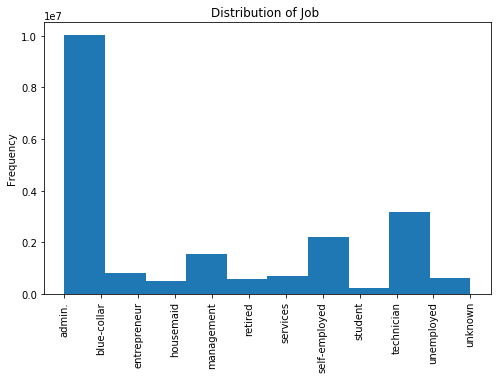

In [29]:
count, bin_edges = np.histogram(new_df['job'])

new_df['job'].plot(kind='hist', figsize = (8,5))
plt.xticks(np.arange(12), labels, rotation=90)
plt.title('Distribution of Job ')
plt.show()

The campaign targets mostly admin workers and is highly focused on low income customers

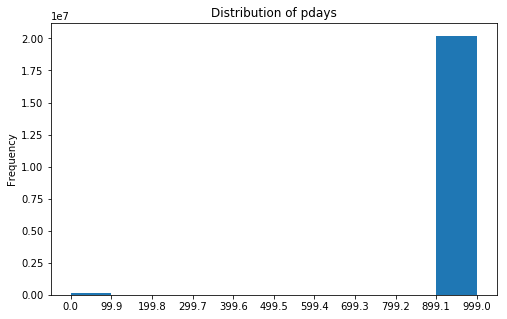

In [30]:
count, bin_edges = np.histogram(new_df['pdays'])

new_df['pdays'].plot(kind='hist', figsize = (8,5), xticks = bin_edges, stacked=True)
plt.title('Distribution of pdays')
plt.show()

Let's investigate any patterns in campaign attributes with respect to campaign outcomes

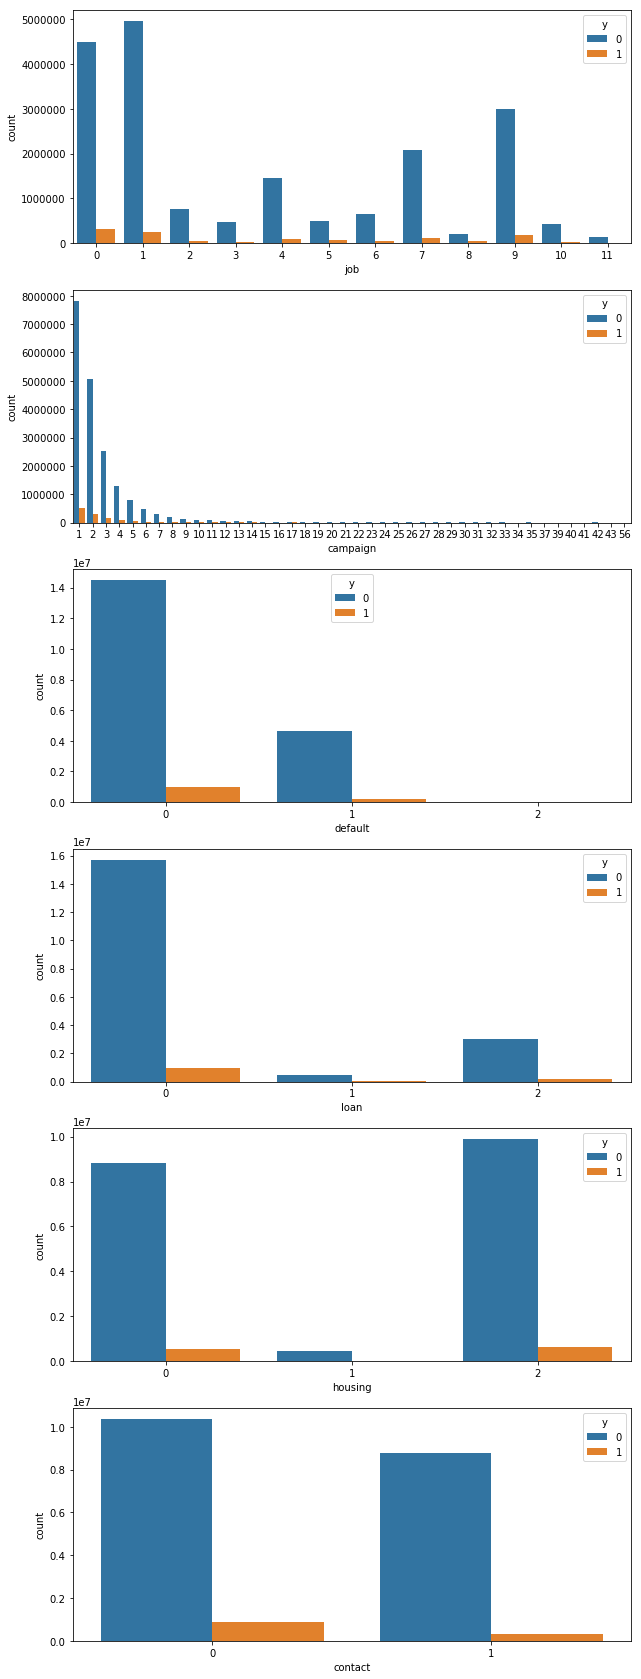

In [31]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(10,30))

sns.countplot(ax=ax1, x='job', hue='y', data=new_df)
#plt.gca().set_title("Distribution of Jobs with Acceptance Rates")

sns.countplot(ax=ax2, x='campaign', hue='y', data=new_df)
#plt.gca().set_title("Distribution of Campaign with Acceptance Rates")

sns.countplot(ax=ax3, x='default', hue='y', data=new_df)
#plt.gca().set_title("Distribution of Default with Acceptance Rates")

sns.countplot(ax=ax4, x='loan', hue='y', data=new_df)
#plt.gca().set_title("Distribution of Loan with Acceptance Rates")

sns.countplot(ax=ax5, x='housing', hue='y', data=new_df)
#plt.gca().set_title("Distribution of Housing with Acceptance Rates")

sns.countplot(ax=ax6, x='contact', hue='y', data=new_df)
#plt.gca().set_title("Distribution of Contact with Acceptance Rates")

plt.show()

In [32]:
print("Category Codes for Housing")
cats_job = dict(zip(df['housing'], df['housing'].astype('category').cat.codes))
sorted(cats_job.items(), key = lambda x: x[1])

Category Codes for Housing


[('no', 0), ('unknown', 1), ('yes', 2)]

In [33]:
print("Category Codes for Loan")
cats_job = dict(zip(df['loan'], df['loan'].astype('category').cat.codes))
sorted(cats_job.items(), key = lambda x: x[1])

Category Codes for Loan


[('no', 0), ('unknown', 1), ('yes', 2)]

In [34]:
print("Category Codes for Contact")
cats_job = dict(zip(df['contact'], df['contact'].astype('category').cat.codes))
sorted(cats_job.items(), key = lambda x: x[1])

Category Codes for Contact


[('cellular', 0), ('telephone', 1)]

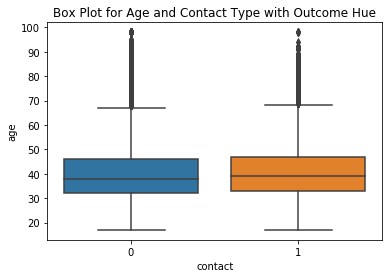

In [35]:
sns.boxplot(x='contact', y='age', data=new_df)
plt.title("Box Plot for Age and Contact Type with Outcome Hue")
plt.show()

There doesn't seem to be a big difference in age and contact type'

In [ ]:
df.month.unique()

In [ ]:
new_df.day_of_week.unique()

In [ ]:
new_df.duration.unique()

In [ ]:
new_df.pdays.unique()

In [ ]:
corr = new_df.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, cmap = 'PuOr', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
#fig, ax = plt.subplots(figsize = (8,8))
sns.jointplot(x='age', y='duration', kind='scatter', data=new_df, joint_kws={'alpha':0.03})
#ax.set_title("Density Plot for Age and Duration")
plt.show()

In [ ]:
sns.jointplot(x='age', y='campaign', data=new_df, kind="kde", xlim=(20,65), ylim=(0,4.5))
#plt.title("Density Plot for Age and Campaign Days")
plt.show()

In [ ]:
sns.jointplot(x='duration', y='campaign', data=new_df, kind="scatter",
              ylim=(0,45), joint_kws={'alpha':0.03})
plt.show()

In [ ]:
sns.lmplot(x='duration', y='campaign', data=new_df, hue = 'y')
plt.show()

In [ ]:
new_df.y.max()

In [ ]:
new_df.columns

In [ ]:
from scipy import stats
import math
#Correlation between independent features and (binary) target var
pbcorr_list = []
for i in new_df.columns:
    if math.isnan(stats.pointbiserialr(new_df[i],new_df['y'])[0]) != True:
        pbcorr_list.append((str(i), stats.pointbiserialr(new_df[i],new_df['y'])[0]))

In [ ]:
pbcorr_list

In [ ]:
list(map(lambda x: x[0], pbcorr_list))

In [ ]:
pbcorr_list[0][0]

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))

pd.DataFrame(pbcorr_list).plot(kind='bar')

#sns.barplot(x = list(map(lambda x: x[0], pbcorr_list)), 
#            y = list(map(lambda x: x[1], pbcorr_list)), 
#            ax = ax)

#ax.set_xticklabels(np.arange(12), list(map(lambda x: x[0], pbcorr_list)), rotation=90)
#ax.set_title("Correlation Between Features and Y")
plt.show()

What is the distribution of the numnber of days since the last contact for customers that are not new?

In [ ]:
arr = new_df[new_df['pdays'] < 999]

In [ ]:
sns.distplot(arr.pdays)

New leads are purchasing more than existing contacts, but keep in mind the number of new leads is disproportionately higher than the number of prospects - thus the highest subscription rates are actually being derived from repeat contacts 

In [ ]:
sns.countplot(x='y', data=arr)

How many are new customers?

In [ ]:
new_df['new_customer'] = [1 if i == 999 else 0 for i in new_df['pdays']]

In [ ]:
sns.countplot(x='new_customer', data=new_df)

In [ ]:
#add number of subscriptions by month

Analysis of Economic Variables

In [ ]:
df_econ = new_df[['emp.var.rate', 'euribor3m', 'cons.conf.idx']]

In [ ]:
#analysis of key economic indicators around november 2008 - must be adjusted

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time')
ax1.set_ylabel('Emp Var Rate and Euribor')
line1, = ax1.plot(df_econ.Date, df_econ['emp.var.rate'], color='lightcoral', label='Emp Var Rate')
ax1.tick_params(axis='y')

ax2 = ax1.twiny()
line2, = ax2.plot(df_econ.Date, df_econ.euribor3m, color='firebrick', label='Euribor')
ax2.tick_params(axis='y')

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax3.set_ylabel('Cons. Conf. Index')  # we already handled the x-label with ax1
line3, = ax3.plot(df_econ.Date, df_econ['cons.conf.idx'], color='blue', label='Cons Conf Index')
ax3.tick_params(axis='y')

plt.suptitle("Key Economic Indicators Before and After November 2008")

plt.legend(handles=[line1, line2, line3])
plt.show()

In [ ]:
#new_df.to_pickle('data/pickle_files/df_pickle')